# Writing a video using OpenCV
While building applications, it becomes important to save demo videos of your work as well as many applications themselves might require saving a video clip. For example, in a surveiallance application, you might have to save a video clip as soon as you see something unusual happening.

In this notebook, we will describe how to save a video in avi and mp4 formats using openCV.

In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [4]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [5]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

## Read Video from Source

In [10]:
source = 'videos/race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [11]:
if not cap.isOpened():
    print("Error opening video stream or file")

### Read and display one frame

In [12]:
ret, frame = cap.read()

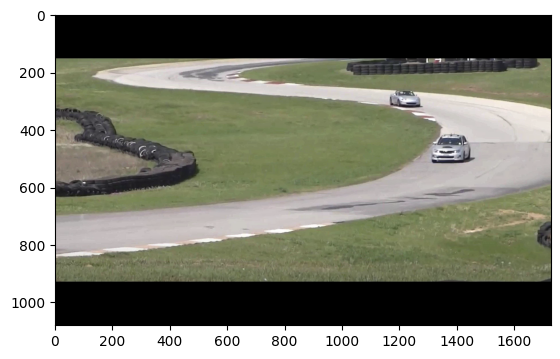

In [14]:
plt.imshow(frame[..., ::-1])
plt.show()

## Display the video file

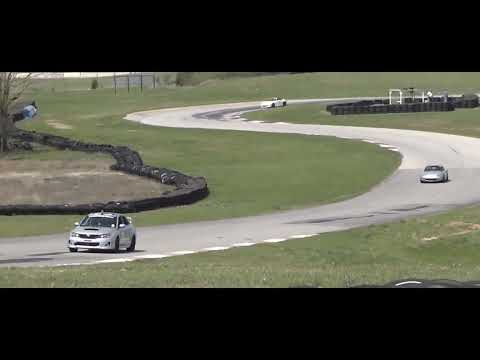

In [15]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

## Write Video using OpenCV
For writing the video, you need to create a videowriter object with the right parameters.

### <font color="green">Function Syntax</font>

```python
VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )
```
where,
**Parameters**

1. `filename`: Name of the output video file.

2. `fourcc`: 4-character code of codec used to compress the frames. For example, `VideoWriter::fourcc('P','I','M','1')` is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

3. `fps`: Framerate of the created video stream.

4. `frameSize`: Size of the video frames.

In [17]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("videos/race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("videos/race_car_out.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 10, (frame_width, frame_height))


### Read frames and write to file

We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [ ]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break